In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins

df_dlist = pd.read_csv('research/listings.csv.gz')
#dropping a row with corrupted data
df_dlist = df_dlist[df_dlist.id != 18476572]

df_list = pd.read_csv('research/listings.csv')

df_cal = pd.read_csv('research/calendar.csv.gz')

df_rv = pd.read_csv('research/reviews.csv.gz')

df_nei = pd.read_csv('research/neighbourhoods.csv')

table = [df_dlist,df_list,df_cal,df_rv,df_nei]


In [3]:
for n in table:
    print('\n' ,n.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2623 entries, 0 to 2623
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 2.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2624 non-null   int64  
 1   name                            2624 non-null   object 
 2   host_id                         2624 non-null   int64  
 3   host_name                       2623 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   2624 non-null   object 
 6   latitude                        2624 non-null   float64
 7   longitude                       2624 non-null   float64
 8   room_type                       2624 non-null   object 
 9   price                    

In [4]:
dlist_c = list(df_dlist.columns)
# for i, v in enumerate(dlist_c):
#     out = f'{i} : {v}'
#     print (out)

In [5]:
#k,v pairs
# testdata = df_dlist.host_identity_verified
# unique, counts = np.unique(testdata, return_counts=True)
# dict(zip(unique,counts))

# testdata2 = df_dlist.host_is_superhost
# unique2, counts2 = np.unique(testdata2, return_counts=True)
# dict(zip(unique2,counts2))

# testdata3 = df_dlist.square_feet
# unique3, counts3 = np.unique(testdata3, return_counts=True)
# dict(zip(unique3,counts3))


In [6]:
#check if super host has to verify
super_veri = df_dlist[(df_dlist['host_identity_verified'] == 'f') & (df_dlist['host_is_superhost'] == 't')]
# super_veri.loc[:,['host_identity_verified','host_is_superhost']]

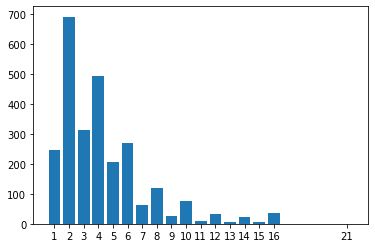

In [7]:
#most common accommodations
df_acc = df_dlist.groupby('accommodates')['accommodates'].count().sort_values(ascending=False)


fig, ax = plt.subplots()
ax.bar(df_acc.index,df_acc)
ax.set_xticks(df_acc.index)
plt.show()

In [8]:
#price distribution
prices = df_list['price']
prices.describe()

count    2624.000000
mean      139.698171
std       134.607059
min        15.000000
25%        60.000000
50%       109.000000
75%       175.000000
max      2000.000000
Name: price, dtype: float64

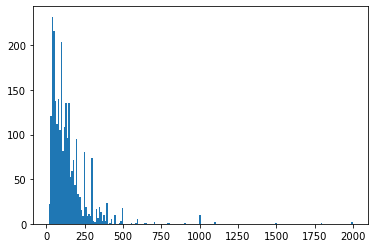

In [9]:
prices.hist(bins=200,grid=False)

In [11]:
most_exp = df_list.max(axis=0)

least_exp = df_list.min(axis=0)

print(most_exp,'\n \n',least_exp)

id                                                                   43593556
name                                         시티와 가까운 럭셔리 콘도에서 1달 사실 여성분 구합니다.
host_id                                                             345006093
neighbourhood_group                                                       NaN
neighbourhood                     Ward F (councilmember Jermaine D. Robinson)
latitude                                                              40.7609
longitude                                                            -74.0299
room_type                                                         Shared room
price                                                                    2000
minimum_nights                                                            365
number_of_reviews                                                         467
reviews_per_month                                                        8.23
calculated_host_listings_count                                  

In [177]:
#location heatmap
map_test = folium.Map(location=[40.72613,-74.048110],
                      tiles = 'Stamen Terrain',
                     zoom_start = 13)



#add measure control
from folium.plugins import MeasureControl
map_test.add_child(MeasureControl())



# #gabe
# from folium.plugins import FloatImage
# url = 'https://s3-us-west-1.amazonaws.com/companies.comparably.com/31512/ceo_v1.jpg'
# FloatImage(url, bottom=5, left=70).add_to(map_test)


# folium.Marker([most_exp[5],most_exp[6]], popup=most_exp[1]).add_to(map_test)
# folium.Marker([least_exp[5],least_exp[6]], popup=least_exp[1]).add_to(map_test)


#heatmap
from folium.plugins import HeatMap
geo_loc = df_list.iloc[:,6:8]
heat_data = [[row['latitude'],row['longitude']] for dex, row in geo_loc.iterrows()]
HeatMap(heat_data, radius=15,blur=15).add_to(map_test)



map_test

In [188]:
#make choropleth map
import geopandas

geo_locs = geopandas.read_file('research/neighbourhoods.geojson')
df_geo = df_dlist[['neighbourhood_cleansed','price']]
df_geo['price'] = df_geo['price'].apply(lambda x: numericalize(x))
geo_mean = df_geo.groupby('neighbourhood_cleansed').mean().reset_index()

geo_locs.dropna(inplace=True,axis=1)

# map_geo = folium.Map(location=[40.72613,-74.048110],
#                      zoom_start = 13)

# map_geo.choropleth(
#     geo_data = geo_locs,
#     data = geo_mean,
#     columns = ['neighbourhood_cleansed','price'],
#     key_on = 'features.neighbourhood',
#     fill_color='YlOrRd', 
#     fill_opacity=0.7
#     )

# folium.MapControl().add_to(map_geo)



/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


AttributeError: 'NoneType' object has no attribute 'get'

In [180]:
import seaborn as sns
df_num = df_dlist[['price','accommodates','host_listings_count','bathrooms',
                   'bedrooms','beds','security_deposit','cleaning_fee',
                   'guests_included','extra_people','minimum_nights','maximum_nights',
                   'number_of_reviews','number_of_reviews_ltm']]

#clean the dataset
#create the df with numeric value only columns
df_num['price'] = df_num['price'].apply(lambda x: numericalize(x))
df_num['security_deposit'] = df_num['security_deposit'].apply(lambda x: numericalize(x))
df_num['cleaning_fee'] = df_num['cleaning_fee'].apply(lambda x: numericalize(x))
df_num['extra_people'] = df_num['extra_people'].apply(lambda x: numericalize(x))

df_num.fillna(0, inplace=True)


df_num.corr()


#g_num = sns.pairplot(df_num)

/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/okugotme/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,price,accommodates,host_listings_count,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm
price,1.000000,0.394357,0.128009,0.242722,0.279727,0.351559,0.135826,0.429395,0.347254,0.098165,0.087633,0.111110,-0.096664,-0.074366
accommodates,0.394357,1.000000,-0.052292,0.363066,0.683802,0.878771,0.149495,0.549332,0.638332,0.095300,0.056132,-0.045242,0.132559,0.214738
host_listings_count,0.128009,-0.052292,1.000000,-0.013978,-0.089719,-0.063165,-0.043017,0.257296,-0.054587,-0.163073,0.058190,0.231518,-0.162567,-0.189478
bathrooms,0.242722,0.363066,-0.013978,1.000000,0.530034,0.367651,0.062656,0.214830,0.282730,0.018538,0.111256,0.043714,-0.010338,0.037605
bedrooms,0.279727,0.683802,-0.089719,0.530034,1.000000,0.673229,0.110318,0.390831,0.477298,0.088811,0.122737,-0.001887,0.029288,0.082281
beds,0.351559,0.878771,-0.063165,0.367651,0.673229,1.000000,0.159251,0.486049,0.623866,0.116827,0.056265,-0.046872,0.102609,0.181632
security_deposit,0.135826,0.149495,-0.043017,0.062656,0.110318,0.159251,1.000000,0.214261,0.128619,0.202976,0.040322,-0.110233,0.013614,0.017448
cleaning_fee,0.429395,0.549332,0.257296,0.214830,0.390831,0.486049,0.214261,1.000000,0.482437,0.085715,0.218262,0.116347,-0.090248,-0.043426
guests_included,0.347254,0.638332,-0.054587,0.282730,0.477298,0.623866,0.128619,0.482437,1.000000,0.272911,0.185208,0.004145,0.105145,0.188620
extra_people,0.098165,0.095300,-0.163073,0.018538,0.088811,0.116827,0.202976,0.085715,0.272911,1.000000,-0.060892,-0.037213,0.051934,0.078145


In [181]:
df_num

,price,accommodates,host_listings_count,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm
0,163.0,2,3.0,1.0,1.0,1.0,500.0,95.0,2,75.0,28,120,41,1
1,82.0,2,2.0,1.0,1.0,0.0,0.0,0.0,2,25.0,3,365,10,1
2,90.0,4,0.0,1.0,1.0,1.0,300.0,60.0,2,20.0,3,365,194,13
3,395.0,3,1.0,1.0,1.0,1.0,2000.0,175.0,2,100.0,15,220,2,0
4,2000.0,4,1.0,2.0,2.0,3.0,3000.0,150.0,3,50.0,150,730,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,139.0,6,5.0,2.0,2.0,4.0,0.0,90.0,1,0.0,2,1125,0,0
2620,89.0,2,5.0,1.5,1.0,1.0,500.0,30.0,1,10.0,2,1125,0,0
2621,77.0,2,0.0,1.0,1.0,1.0,0.0,20.0,1,0.0,1,1125,0,0
2622,43.0,1,1.0,1.0,1.0,2.0,0.0,0.0,1,0.0,7,1125,0,0


In [471]:
g_num.savefig('scatter_matrix_num.png')

Text(0.5, 1.0, 'Price vs. Minimum_nights')

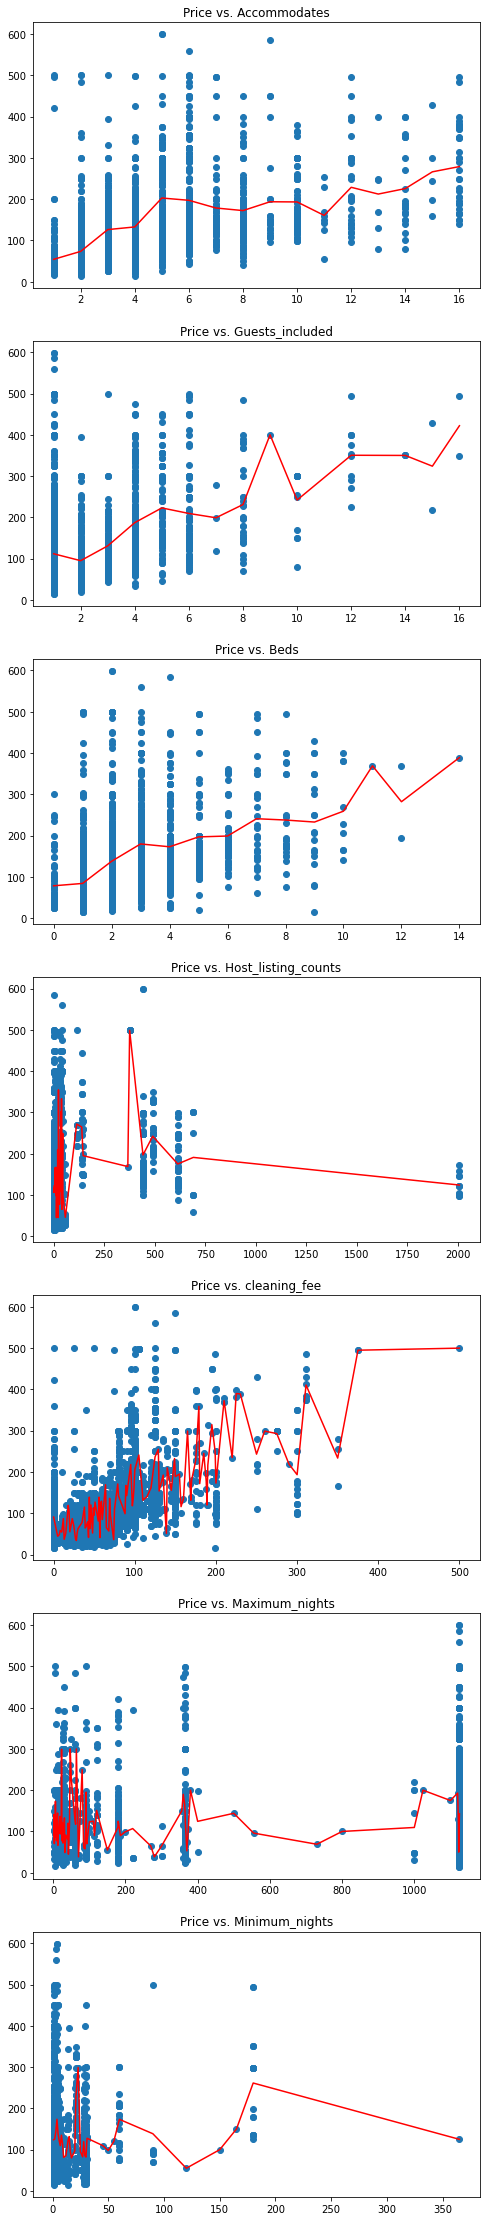

In [249]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,figsize = (8,40))

df_num_no = df_num[df_num['price']<600]
to_plot = ['price','accommodates','guests_included','beds',
           'host_listings_count','cleaning_fee','maximum_nights',
           'minimum_nights']

adj_, avg_ = get_adj_avg(to_plot,df_num_no)
prices, accommodates, guests, beds, host_lsting_count, clean_fee, max_nights, min_nights = adj_
avg_p, avg_a, avg_g, avg_b, avg_h, avg_c, avg_ma, avg_mi = avg_


# plotting
ax1.scatter(accommodates,prices)
ax1.plot(avg_a.index,avg_a,color='red')
ax1.set_title('Price vs. Accommodates')

ax2.scatter(guests,prices)
ax2.plot(avg_g.index,avg_g, color='red')
ax2.set_title('Price vs. Guests_included')

ax3.scatter(beds,prices)
ax3.plot(avg_b.index,avg_b, color='red')
ax3.set_title('Price vs. Beds')

ax4.scatter(host_lsting_count, prices)
ax4.plot(avg_h.index,avg_h, color='red')
ax4.set_title('Price vs. Host_listing_counts')

ax5.scatter(clean_fee, prices)
ax5.plot(avg_c.index,avg_c, color='red')
ax5.set_title('Price vs. cleaning_fee')

ax6.scatter(max_nights,prices)
ax6.plot(avg_ma.index,avg_ma, color='red')
ax6.set_title('Price vs. Maximum_nights')

ax7.scatter(min_nights, prices)
ax7.plot(avg_mi.index,avg_mi, color='red')
ax7.set_title('Price vs. Minimum_nights')

# print(adj_p.describe(),'\n\n\n',adj_a.describe())# code to normalize
# from scipy import stats
# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [242]:
type(adj_[0])

pandas.core.series.Series

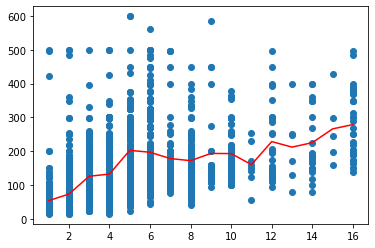

In [17]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2623 entries, 0 to 2623
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  2623 non-null   float64
 1   accommodates           2623 non-null   int64  
 2   host_listings_count    2623 non-null   float64
 3   bathrooms              2622 non-null   float64
 4   bedrooms               2615 non-null   float64
 5   beds                   2608 non-null   float64
 6   security_deposit       2129 non-null   float64
 7   cleaning_fee           2404 non-null   float64
 8   guests_included        2623 non-null   int64  
 9   extra_people           2623 non-null   float64
 10  minimum_nights         2623 non-null   int64  
 11  maximum_nights         2623 non-null   int64  
 12  number_of_reviews      2623 non-null   int64  
 13  number_of_reviews_ltm  2623 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 307.4 KB


In [21]:
#test my functions here
df_num_ = df_num.copy()

df_num_['price'] = df_num_['price'].apply(lambda x: numericalize(x))

df_num_['price']

0       None
1       None
2       None
3       None
4       None
        ... 
2619    None
2620    None
2621    None
2622    None
2623    None
Name: price, Length: 2623, dtype: object

In [238]:
#check how many nan values are in a col
def check_na(col_name,df):
    return sum(df[col_name].isna())


#turn dollars(prices) to 
def numericalize(string):
    if type(string) != str:
        pass
    else:
        num = ''
        for char in list(string):
            if char.isnumeric() or char == '.':
                num += char
        return float(num)
    
    
#get aggregated(adj,avg) data
def get_adj_avg(lst,df):
    adj_= []
    avg_= []
    for x in lst:
        adj_.append(df[x])
        avg_.append(df.groupby(x).price.mean())
    return adj_, avg_
        